In [2]:
!pip install pyupbit

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
import pyupbit
import tensorflow as tf
tf.get_logger().setLevel(3)
# tf.get_logger().setLevel('NONE')
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation

2023-09-06 14:48:17.345110: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-06 14:48:17.370507: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-06 14:48:17.371072: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-06 14:48:17.887877: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
pyupbit.get_tickers(fiat="USD")

['USDT-BTC',
 'USDT-ETH',
 'USDT-XRP',
 'USDT-ETC',
 'USDT-ADA',
 'USDT-TUSD',
 'USDT-SC',
 'USDT-TRX',
 'USDT-BCH',
 'USDT-DGB',
 'USDT-DOGE',
 'USDT-ZRX',
 'USDT-RVN',
 'USDT-BAT']

In [5]:
# pyupbit.get_current_price(['USDT-BTC', 'USDT-ETH'])

In [6]:
ticker = 'USDT-BTC'
interval ='minute3'    
to = '2023-05-25'  
count = 365*3
data = pd.DataFrame()
data = pyupbit.get_ohlcv(ticker=ticker, interval=interval, to=to, count=count)
data

,open,high,low,close,volume,value
2023-05-11 02:24:00,27101.234595,27101.234595,27050.000000,27065.470660,0.046359,1255.111851
2023-05-11 02:27:00,27180.000000,27180.000000,27180.000000,27180.000000,0.013425,364.887695
2023-05-11 02:42:00,27589.307580,27589.307580,27589.307580,27589.307580,0.000423,11.674691
2023-05-11 05:18:00,27711.769800,27711.769800,27711.769800,27711.769800,0.000030,0.822762
2023-05-11 05:51:00,27729.319904,27744.244188,27729.319904,27744.244188,0.015050,417.338494
...,...,...,...,...,...,...
2023-05-25 05:12:00,26410.000000,26410.000000,26410.000000,26410.000000,0.007635,201.637181
2023-05-25 07:39:00,26518.304276,26518.304276,26518.304276,26518.304276,0.000151,3.999756
2023-05-25 07:45:00,26220.000000,26410.000000,26217.441739,26270.399400,0.140684,3691.823721
2023-05-25 07:48:00,26518.304276,26701.163240,26518.304276,26518.304276,0.138329,3673.958419


## Data info

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2023-05-11 02:24:00 to 2023-05-25 07:51:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1095 non-null   float64
 1   high    1095 non-null   float64
 2   low     1095 non-null   float64
 3   close   1095 non-null   float64
 4   volume  1095 non-null   float64
 5   value   1095 non-null   float64
dtypes: float64(6)
memory usage: 59.9 KB


In [8]:
data.describe()

,open,high,low,close,volume,value
count,1095.000000,1095.000000,1095.000000,1095.000000,1.095000e+03,1095.000000
mean,26995.817814,27027.225490,26972.369466,27000.467443,2.990016e-02,807.366555
std,318.637865,323.438202,318.220160,320.274971,7.907668e-02,2140.171204
min,26163.290000,26163.290000,26037.946000,26037.946000,2.000000e-08,0.000529
25%,26800.000000,26813.855741,26769.198359,26800.000000,1.369075e-03,36.872988
50%,26984.754939,26994.052045,26965.552338,26984.809508,5.660370e-03,153.362351
75%,27218.464442,27250.000000,27201.739723,27218.949712,2.562715e-02,686.621366
max,28187.515540,28196.813958,28187.515540,28187.515540,1.286740e+00,34075.166495


In [9]:
data.shape

(1095, 6)

In [10]:
data.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
value     0
dtype: int64

In [11]:
high_prices = data['high'].values
low_prices = data['low'].values

mid_prices = (high_prices + low_prices) / 2
len(mid_prices)

1095

In [12]:
seq_len = 50
sequence_length = seq_len +1

result= []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [13]:
result[:3]

[array([27075.61729768, 27180.        , 27589.30757999, 27711.76979999,
        27736.78204631, 27927.56782401, 28187.51554   , 27896.23320494,
        27872.13178   , 27053.11307684, 27423.37227969, 27899.67372   ,
        27655.20732468, 27405.96081486, 27798.83699999, 27798.83699997,
        27798.83699997, 27798.83699997, 27748.675     , 27748.675     ,
        27517.89294585, 27445.75930588, 27435.80898312, 27748.6748    ,
        27592.24189156, 27435.80898313, 27435.80918312, 27699.79699998,
        27567.80309153, 27435.80918312, 27435.80908312, 27435.80898312,
        27408.44799556, 27435.80898312, 27339.81989125, 27339.81989126,
        27361.18776251, 27490.69519021, 27281.59338047, 27417.52539979,
        27548.48285762, 27548.48285762, 27424.98674181, 27571.09653386,
        27336.31395562, 27603.76073286, 27352.219     , 27598.7354715 ,
        27352.21900001, 27352.21900001, 27598.73547149]),
 array([27180.        , 27589.30757999, 27711.76979999, 27736.78204631,
      

In [14]:
len(result)

1044

## Normalize Data

In [15]:
normalized_data =[]

for window in result:
    normalized_window = [((float(p)/float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)
result

array([[ 0.        ,  0.00385523,  0.01897243, ...,  0.0102159 ,
         0.0102159 ,  0.01932064],
       [ 0.        ,  0.01505915,  0.01956475, ...,  0.00633624,
         0.01540601,  0.01540601],
       [ 0.        ,  0.00443876,  0.00534535, ...,  0.00034172,
         0.00034172,  0.00034172],
       ...,
       [ 0.        , -0.00324193, -0.00734899, ..., -0.02103611,
        -0.02140665, -0.01739355],
       [ 0.        , -0.00412041, -0.00451506, ..., -0.01822379,
        -0.01419765, -0.02180291],
       [ 0.        , -0.00039627, -0.00372147, ..., -0.01011893,
        -0.01775566, -0.00670603]])

In [16]:
result.shape

(1044, 51)

## Split dataset (train:test = 90:10)

In [17]:
row = int(round(result.shape[0] * 0.9))
row

940

In [18]:
train = result[:row, :]
train

array([[ 0.00000000e+00,  3.85522890e-03,  1.89724310e-02, ...,
         1.02158964e-02,  1.02158964e-02,  1.93206370e-02],
       [ 0.00000000e+00,  1.50591457e-02,  1.95647461e-02, ...,
         6.33623988e-03,  1.54060144e-02,  1.54060144e-02],
       [ 0.00000000e+00,  4.43875656e-03,  5.34534859e-03, ...,
         3.41722658e-04,  3.41722658e-04,  3.41722658e-04],
       ...,
       [ 0.00000000e+00,  1.87183602e-13,  0.00000000e+00, ...,
         1.79106589e-02,  2.98844277e-02,  2.02790698e-02],
       [ 0.00000000e+00, -1.87072580e-13,  9.02362250e-03, ...,
         2.98844277e-02,  2.02790698e-02,  2.04651163e-02],
       [ 0.00000000e+00,  9.02362250e-03, -2.40559043e-04, ...,
         2.02790698e-02,  2.04651163e-02,  2.02790698e-02]])

In [19]:
train.shape

(940, 51)

### train dataset

In [20]:
x_train = train[:, :-1]
x_train

array([[ 0.00000000e+00,  3.85522890e-03,  1.89724310e-02, ...,
         1.93206370e-02,  1.02158964e-02,  1.02158964e-02],
       [ 0.00000000e+00,  1.50591457e-02,  1.95647461e-02, ...,
         6.33623988e-03,  6.33623988e-03,  1.54060144e-02],
       [ 0.00000000e+00,  4.43875656e-03,  5.34534859e-03, ...,
        -8.59349512e-03,  3.41722658e-04,  3.41722658e-04],
       ...,
       [ 0.00000000e+00,  1.87183602e-13,  0.00000000e+00, ...,
         1.53019410e-02,  1.79106589e-02,  2.98844277e-02],
       [ 0.00000000e+00, -1.87072580e-13,  9.02362250e-03, ...,
         1.79106589e-02,  2.98844277e-02,  2.02790698e-02],
       [ 0.00000000e+00,  9.02362250e-03, -2.40559043e-04, ...,
         2.98844277e-02,  2.02790698e-02,  2.04651163e-02]])

In [21]:
x_train.shape

(940, 50)

In [22]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[ 0.00000000e+00],
        [ 3.85522890e-03],
        [ 1.89724310e-02],
        ...,
        [ 1.93206370e-02],
        [ 1.02158964e-02],
        [ 1.02158964e-02]],

       [[ 0.00000000e+00],
        [ 1.50591457e-02],
        [ 1.95647461e-02],
        ...,
        [ 6.33623988e-03],
        [ 6.33623988e-03],
        [ 1.54060144e-02]],

       [[ 0.00000000e+00],
        [ 4.43875656e-03],
        [ 5.34534859e-03],
        ...,
        [-8.59349512e-03],
        [ 3.41722658e-04],
        [ 3.41722658e-04]],

       ...,

       [[ 0.00000000e+00],
        [ 1.87183602e-13],
        [ 0.00000000e+00],
        ...,
        [ 1.53019410e-02],
        [ 1.79106589e-02],
        [ 2.98844277e-02]],

       [[ 0.00000000e+00],
        [-1.87072580e-13],
        [ 9.02362250e-03],
        ...,
        [ 1.79106589e-02],
        [ 2.98844277e-02],
        [ 2.02790698e-02]],

       [[ 0.00000000e+00],
        [ 9.02362250e-03],
        [-2.40559043e-04],
        ...,
        

In [23]:
x_train.shape

(940, 50, 1)

In [24]:
y_train = train[:, -1]
y_train

array([ 1.93206370e-02,  1.54060144e-02,  3.41722658e-04, -4.07892853e-03,
       -4.97702201e-03, -1.17744715e-02, -2.14636064e-02, -1.90007447e-02,
       -1.81524608e-02,  2.68294788e-02, -1.32470827e-05, -1.70849568e-02,
       -8.39618817e-03,  1.39488700e-02, -1.41841083e-02,  6.93410304e-04,
        1.76791569e-03, -1.51590335e-02, -1.57658019e-02, -1.54072362e-02,
       -4.70907916e-03,  1.97628688e-03, -5.80232805e-03, -8.96168202e-03,
       -3.34303722e-03,  2.33968012e-03,  2.33967281e-03, -7.21294095e-03,
       -7.31435026e-03, -2.53853126e-03, -2.53852762e-03, -2.53852399e-03,
       -1.54278972e-03, -4.06421085e-04, -1.40195749e-03, -3.03960004e-03,
       -9.99518971e-03, -7.16268706e-03,  3.42787749e-03,  6.52468695e-04,
       -1.00328347e-02, -1.46662266e-02, -9.97264047e-03, -1.38340024e-02,
       -1.98161138e-03, -1.16511924e-02, -2.56194918e-03, -7.43334196e-03,
       -2.56194918e-03,  2.46071574e-03, -1.09362797e-02, -1.96524668e-02,
       -5.80229684e-03, -

In [25]:
y_train.shape

(940,)

### test dataset

In [26]:
x_test = result[row:, :-1] 
x_test

array([[ 0.00000000e+00, -9.18133267e-03, -1.85296223e-13, ...,
         1.11547906e-02,  1.13391734e-02,  1.11547906e-02],
       [ 0.00000000e+00,  9.26641067e-03, -3.44919731e-04, ...,
         2.07106575e-02,  2.05245662e-02,  2.05245662e-02],
       [ 0.00000000e+00, -9.52308558e-03,  1.76773281e-05, ...,
         1.11547906e-02,  1.11547906e-02,  1.11547906e-02],
       ...,
       [ 0.00000000e+00, -3.24193153e-03, -7.34898826e-03, ...,
        -1.66487087e-02, -2.10361062e-02, -2.14066451e-02],
       [ 0.00000000e+00, -4.12041483e-03, -4.51505623e-03, ...,
        -1.78520498e-02, -1.82237939e-02, -1.41976462e-02],
       [ 0.00000000e+00, -3.96274215e-04, -3.72146720e-03, ...,
        -1.41617313e-02, -1.01189255e-02, -1.77556598e-02]])

In [27]:
x_test.shape

(104, 50)

In [28]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#x_test
x_test.shape

(104, 50, 1)

In [29]:
y_test = result[row:, -1]
y_test.shape

(104,)

In [30]:
x_train.shape, x_test.shape

((940, 50, 1), (104, 50, 1))

### Build a Model

In [31]:
model = Sequential() 

model.add(LSTM(50, return_sequences = True, input_shape=(50, 1)))
model.add(LSTM(64, return_sequences = False))                   
model.add(Dense(1, activation='linear'))   
model.compile(loss='mse', optimizer='rmsprop')

model.summary()

2023-09-06 14:48:35.023197: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-06 14:48:35.024056: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-09-06 14:48:35.210558: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gra

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


2023-09-06 14:48:35.336759: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-06 14:48:35.337733: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-06 14:48:35.338548: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

### Training & Prediction

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
import os

start = datetime.now()

checkpoint_path = "oracle/model_weights/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

model.fit(x_train, y_train,
         validation_data = (x_test, y_test),
         batch_size = 10,
         epochs = 20,
         callbacks=[cp_callback])

pred = model.predict(x_test)

stop = datetime.now()

delta = stop - start

Epoch 1/20


2023-09-06 14:48:35.739839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-06 14:48:35.741079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-06 14:48:35.741916: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

92/94 [============================>.] - ETA: 0s - loss: 1.8968e-04

2023-09-06 14:48:38.516176: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-06 14:48:38.517475: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-06 14:48:38.518422: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus


Epoch 1: saving model to oracle/model_weights/cp.ckpt
94/94 [==============================] - 3s 20ms/step - loss: 1.8752e-04 - val_loss: 2.3847e-04
Epoch 2/20
94/94 [==============================] - ETA: 0s - loss: 1.5700e-04
Epoch 2: saving model to oracle/model_weights/cp.ckpt
94/94 [==============================] - 1s 13ms/step - loss: 1.5700e-04 - val_loss: 1.6670e-04
Epoch 3/20
91/94 [============================>.] - ETA: 0s - loss: 1.3460e-04
Epoch 3: saving model to oracle/model_weights/cp.ckpt
94/94 [==============================] - 1s 12ms/step - loss: 1.3482e-04 - val_loss: 1.3351e-04
Epoch 4/20
91/94 [============================>.] - ETA: 0s - loss: 1.2865e-04
Epoch 4: saving model to oracle/model_weights/cp.ckpt
94/94 [==============================] - 1s 12ms/step - loss: 1.3082e-04 - val_loss: 2.2848e-04
Epoch 5/20
90/94 [===========================>..] - ETA: 0s - loss: 1.1000e-04
Epoch 5: saving model to oracle/model_weights/cp.ckpt
94/94 [======================

2023-09-06 14:49:05.314141: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-06 14:49:05.316094: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-06 14:49:05.317548: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

4/4 [==============================] - 0s 6ms/step


In [33]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [34]:
input = tf.fill([1,50,1],0)
# input
model.predict(input)

2023-09-06 14:49:07.291413: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-06 14:49:07.292451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-06 14:49:07.293425: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 512ms/step


array([[-0.00651883]], dtype=float32)

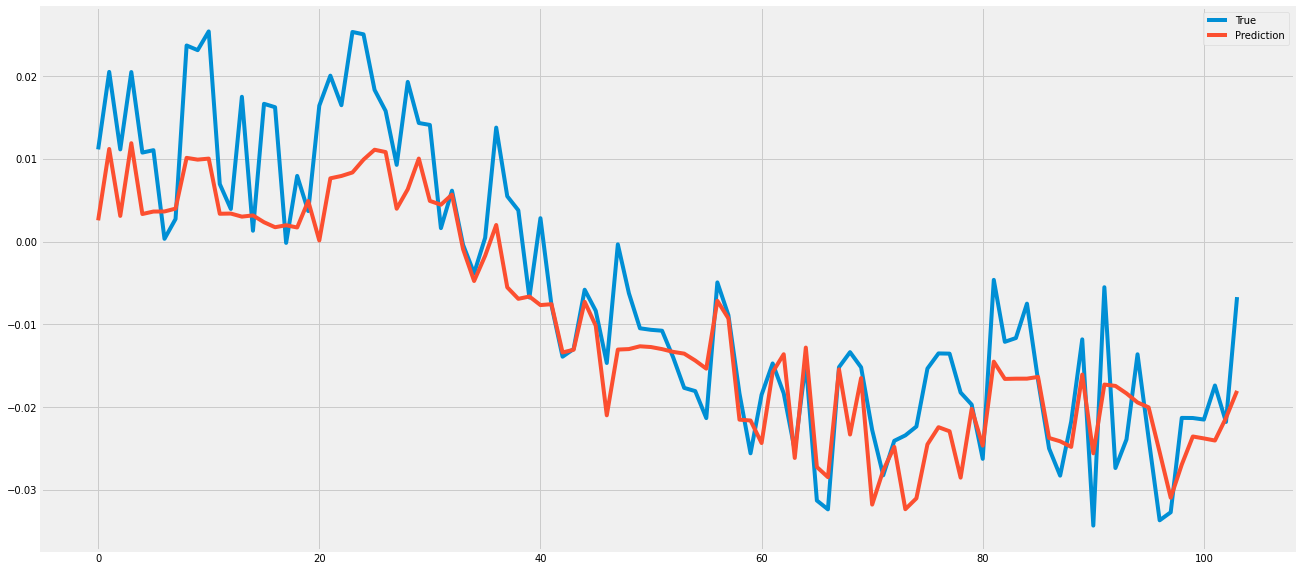

In [35]:
fig = plt.figure(facecolor='white', figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

### Results

In [36]:
print('LSTM\n')

loss = mean_squared_error(y_test, pred)
print('MSE: ', loss)

r2 = r2_score(y_test, pred)
print('R2: ', r2)

err = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE: ', err)

seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

lstm = ('LSTM', loss, r2, err, seconds)

LSTM

MSE:  5.479751634691772e-05
R2:  0.791016737873671
RMSE:  0.007402534454287782
Time to compute:  30.054816 seconds


In [37]:
data.to_csv('usd_btc_out.csv')